(chap:cmds)= 
# Estimating XRB Masses with CMDs and CCDs

X-ray sources that are associated with point sources (i.e. stars) or compact star clusters and that are not flagged as SNR are considered genuine XRBs. The masses of their donor stars, then, are obtained by comparing their photometry across the filters available to us to stellar evolutionary models. The most useful tools for this process are color-magnitude diagrams (CMDs) and color-color diagrams (CCDs). The former is used to estimate the mass of isolated XRBs, while the latter allows us to approximate the most likely donor star mass of XRBs that exist within compact star clusters. 

![alt](../images/example_cmd.png)

![alt](../images/example_ccd.png)

This chapter demonstrates how to pull the photometry of each point source or cluster, calculate their magnitudes, and compare their magnitudes and colors to the models included in the `XRBID` package. 

(sec:getphots)=
## Extracting photometry with `GetDaoPhots()`

Before we can create a CMD or CCD, we need to extract the photometry of each optical counterpart in each filter. Following the procedures in {ref}`sec:crossref`, the `DataFrame` named `DaoCleanMatch` now contains the name of each X-ray source (`CSC ID`), and the ID of each point source that falls within 2-$\sigma$ in each filter (`F555W ID`, `F435W ID`, `F814W ID`). To pull each point source's photometry from the appropriate filter data file, we use `XRBID.Sources.GetDaoPhots()`:

In [1]:
import numpy as np 
from XRBID.Sources import LoadSources, GetDaoPhots

# Ideally, you would run this on a DataFrame containing only point sources or clusters,
# but for this demonstration, I'll pull the info for all previously-identified 
# objects from the DaoClean() step of this guide
DaoCleanMatch = LoadSources("../testdata/M101_daoclean_matches.frame")

dist = 6.4e6 # units pc, from Chandar et al. 2020
dmod = 5 * np.log10(dist) - 5

DaoCleanPhots = GetDaoPhots(DaoCleanMatch, 
                            photfiles=["../testdata/photometry_M101_f555w_acs_sources.ecsv",
                                       "../testdata/photometry_M101_f435w_acs_sources.ecsv",
                                       "../testdata/photometry_M101_f814w_acs_sources.ecsv"],  
                            idheads=["F555W ID", "F435W ID", "F814W ID"], 
                            filters=["F555W", "F435W", "F814W"], 
                            magheader="aperture_mag_corr", dmod=dmod)
display(DaoCleanPhots)

Reading in sources from ../testdata/M101_daoclean_matches.frame...
Searching ../testdata/photometry_M101_f555w_acs_sources.ecsv
Searching ../testdata/photometry_M101_f435w_acs_sources.ecsv
Searching ../testdata/photometry_M101_f814w_acs_sources.ecsv


,X,Y,F555W ID,F435W ID,F814W ID,CSC ID,F555W,F435W,F814W
0,11331.067786,12533.111216,101364,143088.0,NaN,2CXO J140312.5+542056,-9.008009,-8.693963,NaN
1,11327.699419,12536.055626,101394,143125.0,148555.0,2CXO J140312.5+542056,-9.229914,-8.773200,-9.919766
2,11344.963322,12537.104504,101442,143189.0,148645.0,2CXO J140312.5+542056,-8.117305,-7.383763,-9.247246
3,11323.312878,12538.940418,101505,143293.0,NaN,2CXO J140312.5+542056,-9.178998,-8.697017,NaN
4,11332.293329,12541.942013,101528,143332.0,NaN,2CXO J140312.5+542056,-10.077190,-9.155895,NaN
...,...,...,...,...,...,...,...,...,...
1397,5443.850802,6942.044065,3143,4807.0,6523.0,2CXO J140346.1+541615,-8.644579,-7.398538,-10.176378
1398,3436.981758,10161.470633,52656,74953.0,71911.0,2CXO J140357.6+541856,-11.382241,-11.394625,-11.491202
1399,3445.711155,10162.184256,52713,74989.0,72017.0,2CXO J140357.6+541856,-5.801205,-5.828547,-7.045369
1400,6813.402988,4150.018831,68,105.0,100.0,2CXO J140338.3+541355,-5.285409,-3.928275,-7.542093


## Estimating Stellar Masses on a CMD

Once you've pulled the photometry of each star and 

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='F555W - F814W', ylabel='F555W'>)

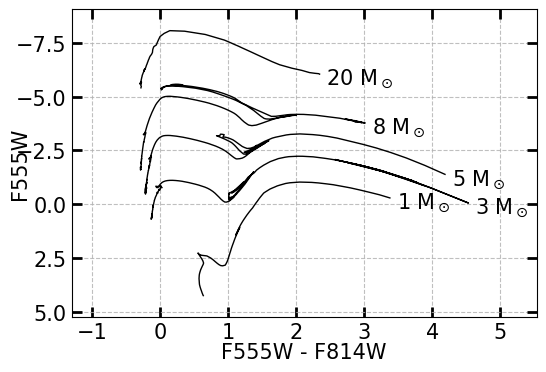

In [2]:
from XRBID.CMDs import MakeCMD
MakeCMD(xcolor=["F555W", "F814W"], ycolor="F555W")

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='F555W - F814W', ylabel='F555W'>)

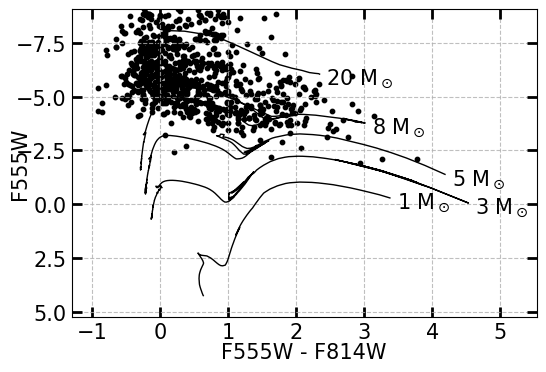

In [3]:
MakeCMD(DaoCleanPhots, xcolor=["F555W", "F814W"], ycolor="F555W")

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='F555W - F814W', ylabel='F555W'>)

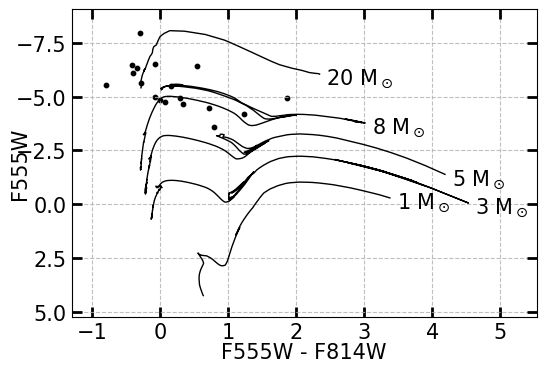

In [10]:
from XRBID.DataFrameMod import Find
TempSources = Find(DaoCleanPhots, "CSC ID = 2CXO J140312.7+541743")
MakeCMD(TempSources, xcolor=["F555W", "F814W"], ycolor="F555W")

### 

## Aging Clusters on a CCD

Plotting reddening arrow for V-I vs. B-V


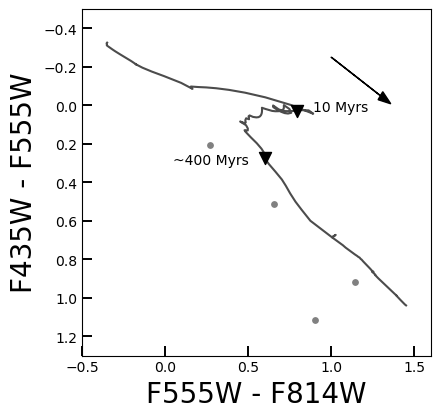

In [17]:
from XRBID.CMDs import MakeCCD
from XRBID.DataFrameMod import RemoveElse, FindUnique

# Picking out a few clusters to plot
clusters = ["2CXO J140309.7+542114", "2CXO J140313.9+542136", 
           "2CXO J140304.6+542037", "2CXO J140319.2+542149"]
TempSources = RemoveElse(FindUnique(DaoCleanPhots, header="CSC ID"), 
                         clusters, header="CSC ID")

MakeCCD(TempSources, color="gray", E_BV=0.2, model_dir="XRBID")